In [2]:
import json
import time

import numpy as np
import pandas as pd
import PIL
import matplotlib.pyplot as plt

import albumentations as A
import cv2

In [3]:
dataset = "test"
data_root = "/home/davi/workspace/data/piedata(1008)/pie/annotations/"
data_json = data_root + f"instancesPie(1008)_{dataset}2019.json"
with open(data_json, "r") as f:
    test_json = json.load(f)
test_json.keys()

dict_keys(['licenses', 'images', 'annotations', 'categories'])

In [4]:
df_images = pd.DataFrame(test_json["images"])
df_images.head()

,file_name,height,width,id
0,f447ffede2ef85e73a191f8c1ed3f9df_c3RhdGxpbmtzL...,273,331,73075
1,f447ffede2ef85e73a191f8c1ed3f9df_c3RhdGxpbmtzL...,273,303,73076
2,f449d055d0020a85e6991e21e4b8e2df_d3d3LnphcG9wY...,331,535,73077
3,f449d8f2044f441270110f1a3774ff04_d3d3LnNoaXJ1c...,376,737,73078
4,f44a875dc618aacc6fc8a09105a2b163_bWFpbC50ZGItZ...,342,347,73079


In [5]:
df_anno = pd.DataFrame(test_json['annotations'])
df_anno.head()

,image_id,category_id,bbox,area,id
0,73075,0,"[191.0, 32.0, 285.0, 184.0, 191.0, 137.0]",11225.039932,422950
1,73075,0,"[285.0, 184.0, 223.0, 237.0, 191.0, 137.0]",4399.705457,422951
2,73075,0,"[223.0, 237.0, 172.0, 240.0, 191.0, 137.0]",2705.904134,422952
3,73075,0,"[172.0, 240.0, 135.0, 226.0, 191.0, 137.0]",2088.187248,422953
4,73075,0,"[135.0, 226.0, 109.0, 203.0, 191.0, 137.0]",1834.405884,422954


In [6]:
df_cate = pd.DataFrame(test_json['categories'])
df_cate

,supercategory,id,name
0,Series,0,Series


In [7]:
def plot_pie_and_box(image, annotations):
    
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    ax.imshow(image)
    ax.axis("off")
    print("number_of_annotatino", len(annotations))
    for key_points in annotations:
        x1,y1, x2,y2, x3,y3 = key_points
        
        # line
        ax.plot([x1,x2],[y1,y2],'-r')
        ax.plot([x2,x3],[y2,y3],'-r')
        ax.plot([x3,x1],[y3,y1],'-r')
        
        # scatter
        ax.plot(x1,y1,'or',markersize=10)
        ax.plot(x2,y2,'or',markersize=10)
        
        # center_point
        ax.plot(x3,y3,'*b',markersize=20)
    
    plt.show()

number_of_annotatino 3


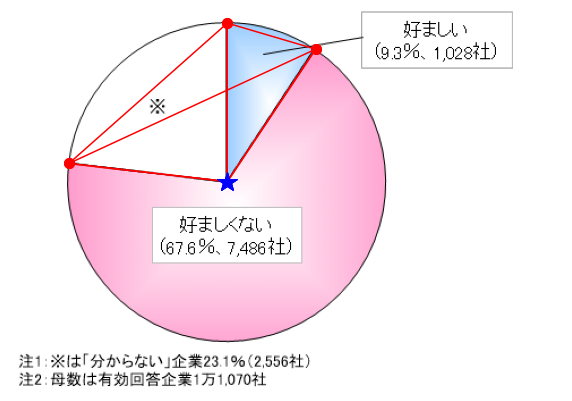

True
number_of_annotatino 3


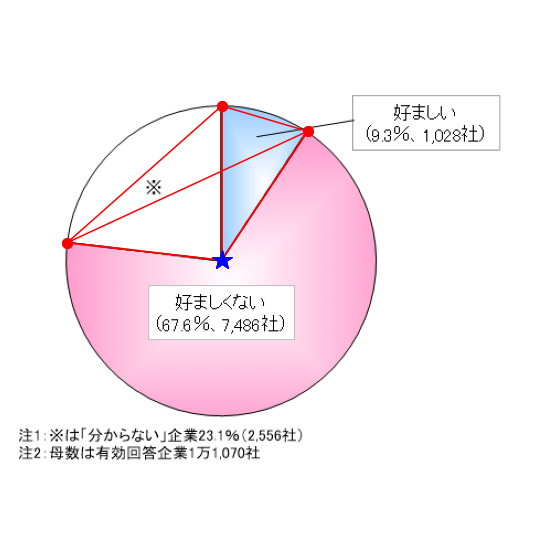

In [17]:
idx = 5
image_root = f"/home/davi/workspace/data/piedata(1008)/pie/images/{dataset}2019/"
image_path = image_root + df_images.iloc[idx]["file_name"]

image_id = df_images.iloc[idx]["id"]
annotations = df_anno[df_anno["image_id"] == image_id]

# image = cv2.imread(image_path, cv2.IMREAD_COLOR)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# image = image/255.
PIL_image = PIL.Image.open(image_path)
image = np.array(PIL_image)/255.
PIL_image.close()
plot_pie_and_box(image, annotations["bbox"])

# Pad to make square
H, W, C = image.shape
if H != W:
    long, short = max(H, W), min(H, W)
    pad_size, is_odd = divmod(long-short, 2)

    # v_pad
    if long == W:
        up_pad = np.zeros([pad_size, W, C])
        down_pad = np.zeros([pad_size + is_odd, W, C])
        image = np.concatenate(
            (up_pad, image, down_pad), axis = 0
        )
        shifted_kp = []
        for key_points in annotations["bbox"]:
            x1,y1, x2,y2, x3,y3 = key_points
            shifted_kp.append([
                x1, y1+pad_size,
                x2, y2+pad_size,
                x3, y3+pad_size
            ])

    # h_pad
    elif long == H:
        left_pad = np.zeros([H, pad_size, C])
        right_pad = np.zeros([H, pad_size + is_odd, C])
        image = np.concatenate(
            (left_pad, image, right_pad), axis = 1
        )
        shifted_kp = []
        for key_points in annotations["bbox"]:
            x1,y1, x2,y2, x3,y3 = key_points
            shifted_kp.append([
                x1+pad_size, y1,
                x2+pad_size, y2,
                x3+pad_size, y3
            ])

        
print(image.shape[0] == image.shape[1])
plot_pie_and_box(image, shifted_kp)